In [54]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm

#run this first to install glmnet for python
#pip install glmnet_py
#import glmnet_python
#from glmnet import glmnet; from glmnetPlot import glmnetPlot
#from glmnetPrint import glmnetPrint; from glmnetCoef import glmnetCoef; from glmnetPredict import glmnetPredict
#from cvglmnet import cvglmnet; from cvglmnetCoef import cvglmnetCoef
#from cvglmnetPlot import cvglmnetPlot; from cvglmnetPredict import cvglmnetPredict

#run this first to install group_lasso for python
#pip install group-lasso
from group_lasso import LogisticGroupLasso


## Logistic Regression

In [17]:
#New Data set - UCI Wine data
wine = sklearn.datasets.load_wine()
print(wine.keys())
print(wine['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:          

In [18]:
wine_df = pd.DataFrame(np.concatenate((wine['target'].reshape(-1, 1), wine['data']), axis=1), 
    columns= ['target'] +  wine['feature_names'])
wine_df

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [19]:
# The dataset has 3 classes, but let's use 2 for now
# And let's use just one predictor variable to make it easier to visualize
# Using sklearn
## NOTE: sklearn's deafult for LogisticRegression uses regularization (rdige) unless you specify it not to 

wine_filtered_df = wine_df[wine_df['target'] != 2]
X = wine_filtered_df['proline'].values.reshape(-1, 1)
y = wine_filtered_df['target'].values

model_1_feature = LogisticRegression(penalty=None)
model_1_feature.fit(X, y)

# Get predicted probabilities for the positive class
predicted_probs_1_feature = model_1_feature.predict_proba(X)[:, 1]

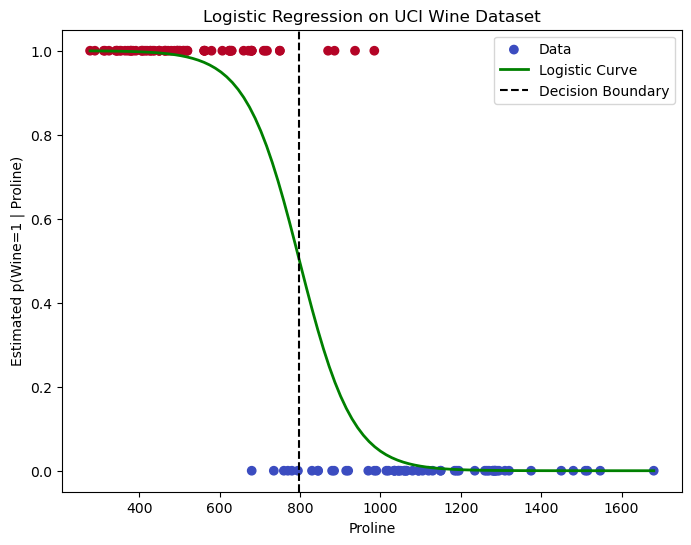

In [20]:
# Generate predictions on some new data to see the logistic curve
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
predicted_probs = model_1_feature.predict_proba(X_new)[:, 1]

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, c=y, cmap='coolwarm', label='Data')
plt.plot(X_new, predicted_probs, color='green', label='Logistic Curve', linewidth=2)
plt.axvline(-model_1_feature.intercept_[0] / model_1_feature.coef_[0][0], color='black', linestyle='dashed', label='Decision Boundary')
plt.xlabel('Proline')
plt.ylabel('Estimated p(Wine=1 | Proline)')
plt.title('Logistic Regression on UCI Wine Dataset')
plt.legend()
plt.show()


In [21]:
intercept = model_1_feature.intercept_[0]
coefficient = model_1_feature.coef_[0][0]

print(f'Intercept: {intercept:.4f}')
print(f'Coefficient for Proline: {coefficient:.4f}')

# Compute accuracy
accuracy = model_1_feature.score(X, y)
print(f'Model Accuracy: {accuracy:.4f}')

Intercept: 11.9751
Coefficient for Proline: -0.0150
Model Accuracy: 0.9231


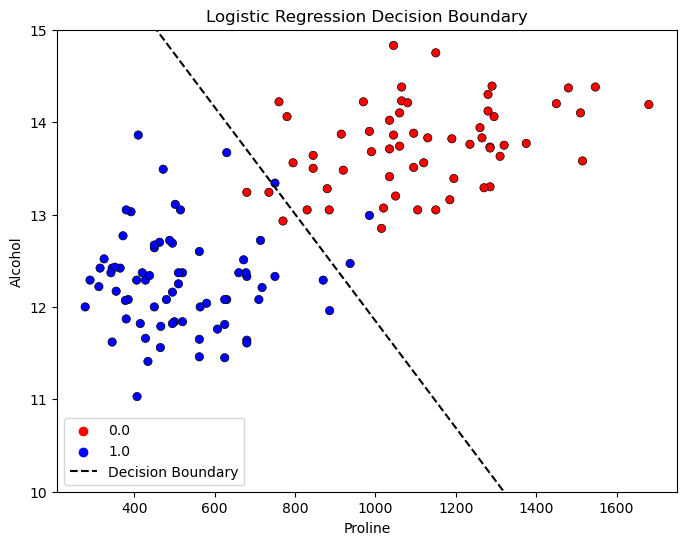

In [22]:
# Now let's use two predictors
X = wine_filtered_df[['proline', 'alcohol']].values
y = wine_filtered_df['target'].values

model_2_features = LogisticRegression()
model_2_features.fit(X, y)

intercept = model_2_features.intercept_[0]
coef_proline, coef_alcohol = model_2_features.coef_[0]

# Generate decision boundary line
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(intercept + coef_proline * x_vals) / coef_alcohol

plt.figure(figsize=(8, 6))
sns.scatterplot(x=wine_filtered_df['proline'], y=wine_filtered_df['alcohol'], hue=wine_filtered_df['target'], palette=['red', 'blue'], edgecolor='k')
plt.plot(x_vals, y_vals, color='black', linestyle='dashed', label='Decision Boundary')
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.ylim(10, 15)
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


In [23]:
intercept = model_2_features.intercept_[0]
coefficient_0 = model_2_features.coef_[0][0]
coefficient_1 = model_2_features.coef_[0][1]

print(f'Intercept: {intercept:.4f}')
print(f'Coefficient for Proline: {coefficient_0:.4f}')
print(f'Coefficient for Alcohol: {coefficient_1:.4f}')

# Compute accuracy
accuracy = model_2_features.score(X, y)
print(f'Model Accuracy: {accuracy:.4f}')

Intercept: 36.5000
Coefficient for Proline: -0.0120
Coefficient for Alcohol: -2.0700
Model Accuracy: 0.9538


### Logistic Regression on All Features

In [32]:
# To demonstate L1 regularized logistic regression, we'll use 2 classes
X = wine_filtered_df.iloc[:, 1:].values
y = wine_filtered_df['target'].values

# Scale features first for L1 regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#note sklearn adds a tiny amount of ridge regularization for numerical stability
non_regularized_fit = LogisticRegression(penalty=None)
non_regularized_fit.fit(X_scaled, y)

# Compare coefficients
coef_comparison = pd.DataFrame( non_regularized_fit.coef_.T,
    columns = ['Coefficients'],
    index=wine.feature_names
)

# Display coefficient comparison
print(coef_comparison)

                              Coefficients
alcohol                          -5.170788
malic_acid                       -1.836361
ash                              -4.407754
alcalinity_of_ash                 5.444081
magnesium                        -0.729197
total_phenols                     0.454998
flavanoids                       -1.130595
nonflavanoid_phenols              0.624550
proanthocyanins                   0.805263
color_intensity                  -1.702854
hue                               0.686004
od280/od315_of_diluted_wines     -2.753911
proline                          -7.309995


## Multinomial Logistic Regression

In [55]:
# Now we'll use all 3 classes but go back to 2 features to visualize
X = wine_df[['proline', 'alcohol']].values
y = wine_df['target'].values

model = LogisticRegression(penalty=None, multi_class='multinomial')
model.fit(X, y)

/Users/gallen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/gallen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', penalty=None)

In [34]:
print(f'\t \t \tClass 1 Class 2 Class 3')
print(f'Intercepts: \t \t{model.intercept_[0]:.4f} {model.intercept_[1]:.4f} {model.intercept_[2]:.4f}')
print(f'Coefficients for Proline: {model.coef_[0][0]:.4f} {model.coef_[1][0]:.4f} {model.coef_[2][0]:.4f}')
print(f'Coefficients for Alcohol: {model.coef_[0][1]:.4f} {model.coef_[1][1]:.4f}  {model.coef_[2][1]:.4f}')

# Compute accuracy
accuracy = model.score(X, y)
print(f'Model Accuracy: {accuracy:.4f}')

	 	 	Class 1 Class 2 Class 3
Intercepts: 	 	-9.1208 23.5281 -14.4073
Coefficients for Proline: 0.0096 -0.0060 -0.0037
Coefficients for Alcohol: 0.1336 -1.4836  1.3500
Model Accuracy: 0.7809


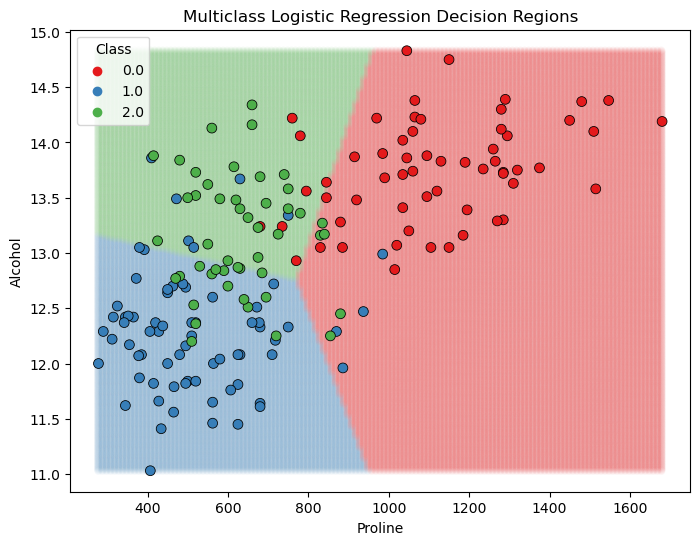

In [35]:
# We can also visualize what the predictions will look like
x1_seq = np.arange(X[:, 0].min(), X[:, 0].max(), 10)
x2_seq = np.arange(X[:, 1].min(), X[:, 1].max(), 0.01)
x1_grid, x2_grid = np.meshgrid(x1_seq, x2_seq)
x_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]

# Predict classes for grid points
wine_grid = model.predict(x_grid)

x_grid_df = pd.DataFrame(x_grid, columns=['Proline', 'Alcohol'])
x_grid_df['pred_class'] = wine_grid

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_grid_df['Proline'], y=x_grid_df['Alcohol'], hue=x_grid_df['pred_class'], alpha=0.05, palette='Set1', legend=False)
sns.scatterplot(x=wine_df['proline'], y=wine_df['alcohol'], hue=wine_df['target'], palette='Set1', edgecolor='k', s=50)
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.title('Multiclass Logistic Regression Decision Regions')
plt.legend(title='Class')
plt.show()

## Regularized Logistic & Multinomial

### L1-regularized logistic regression

In [49]:
# To demonstate L1 regularized logistic regression, we'll go back to 2 classes
X = wine_filtered_df.iloc[:, 1:].values
y = wine_filtered_df['target'].values

# Scale features first for L1 regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

alpha_seq = np.logspace(-3, 1, 1000)

cvfit = LogisticRegressionCV(Cs=alpha_seq, cv=5, penalty='l1', solver='liblinear')
cvfit.fit(X_scaled, y)

non_regularized_fit = LogisticRegression(penalty=None)
non_regularized_fit.fit(X_scaled, y)

# Compare coefficients
coef_comparison = pd.DataFrame(
    np.hstack((cvfit.coef_.T, non_regularized_fit.coef_.T)),
    columns=['Selected alpha', 'alpha = 0'],
    index=wine.feature_names
)

# Display coefficient comparison
print(coef_comparison)

                              Selected alpha  alpha = 0
alcohol                            -1.876490  -5.170788
malic_acid                         -0.587457  -1.836361
ash                                -1.108030  -4.407754
alcalinity_of_ash                   1.341114   5.444081
magnesium                           0.000000  -0.729197
total_phenols                       0.000000   0.454998
flavanoids                          0.000000  -1.130595
nonflavanoid_phenols                0.000000   0.624550
proanthocyanins                     0.000000   0.805263
color_intensity                    -0.767782  -1.702854
hue                                 0.000000   0.686004
od280/od315_of_diluted_wines       -0.777998  -2.753911
proline                            -2.855500  -7.309995


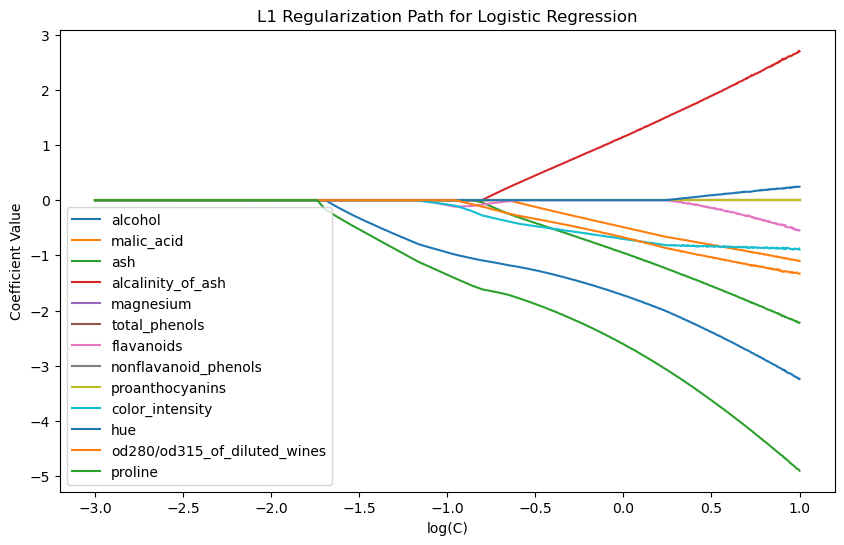

In [51]:
#plot regularization path


coefs = []
for c in alpha_seq:
    clf = LogisticRegression(C=c, penalty='l1', solver='liblinear', tol=0.0001, warm_start=True)
    clf.fit(X_scaled, y)
    coefs.append(clf.coef_.ravel().copy())

coefs = np.array(coefs)
plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(np.log10(alpha_seq), coefs[:, i])

plt.xlabel('log(C)')
plt.ylabel('Coefficient Value')
plt.title('L1 Regularization Path for Logistic Regression')
plt.legend(wine.feature_names)
plt.show()

### Group Lasso Regularized Multinomial Regression

In [56]:
# Back to 3 classes, now with all the features
X = wine_df.iloc[:, 1:].values
y = wine_df['target'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
alpha_seq = np.logspace(-5, 1, 1000)

# Perform logistic regression with grouped multinomial
group_lasso = LogisticGroupLasso(groups=np.arange(X_scaled.shape[1]), group_reg=0.02, l1_reg=0, supress_warning=True)
group_lasso.fit(X_scaled, y)

# Perform cross-validated logistic regression with ungrouped multinomial
cvfit_ungrouped = LogisticRegressionCV(Cs=alpha_seq, cv=5, penalty='l1', solver='saga', multi_class='multinomial')
cvfit_ungrouped.fit(X_scaled, y)

# Fit non-regularized multinomial model (alpha = 0)
non_regularized_fit = LogisticRegression(penalty=None, solver='lbfgs', multi_class='multinomial')
non_regularized_fit.fit(X_scaled, y)

coef_grouped = pd.DataFrame(group_lasso.coef_, columns=['Class 1', 'Class 2', 'Class 3'], index=wine.feature_names)
coef_not_regularized = pd.DataFrame(non_regularized_fit.coef_.T, columns=['Class 1', 'Class 2', 'Class 3'], index=wine.feature_names)
coef_ungrouped = pd.DataFrame(cvfit_ungrouped.coef_.T, columns=['Class 1', 'Class 2', 'Class 3'], index=wine.feature_names)


/Users/gallen/anaconda3/lib/python3.10/site-packages/group_lasso/_fista.py:114: ConvergenceWarning: The FISTA iterations did not converge to a sufficient minimum.
You used subsampling then this is expected, otherwise, try increasing the number of iterations or decreasing the tolerance.
  warnings.warn(
/Users/gallen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/gallen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gallen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always u

In [18]:
print('Non-Regularized Coefficients:')
print(coef_not_regularized)

Non-Regularized Coefficients:
                               Class 1   Class 2   Class 3
alcohol                       2.290151 -2.851426  0.561275
malic_acid                    1.089570 -1.249943  0.160373
ash                           1.812445 -3.213144  1.400699
alcalinity_of_ash            -2.929329  2.204038  0.725291
magnesium                     0.312368  0.188649 -0.501017
total_phenols                 0.083440 -0.299991  0.216551
flavanoids                    1.981124  1.552817 -3.533942
nonflavanoid_phenols         -0.511311  1.368995 -0.857684
proanthocyanins               0.306206  0.517345 -0.823552
color_intensity               0.118148 -4.032232  3.914083
hue                           0.398260  2.371247 -2.769507
od280/od315_of_diluted_wines  2.456049 -0.202323 -2.253726
proline                       3.595753 -4.229701  0.633949


In [19]:
print('Group Lasso Regularized Multinomial Coefficients:')
print(coef_grouped)

Grouped Multinomial Coefficients:
                               Class 1   Class 2   Class 3
alcohol                       0.511702 -0.652107  0.140405
malic_acid                    0.015751 -0.097097  0.081345
ash                           0.101131 -0.188674  0.087544
alcalinity_of_ash            -0.122680  0.064321  0.058359
magnesium                     0.000000 -0.000000  0.000000
total_phenols                 0.000000  0.000000 -0.000000
flavanoids                    0.630247  0.239980 -0.870228
nonflavanoid_phenols         -0.000000  0.000000  0.000000
proanthocyanins               0.000000  0.000000 -0.000000
color_intensity               0.084423 -0.565352  0.480929
hue                           0.056577  0.286982 -0.343559
od280/od315_of_diluted_wines  0.312980  0.080854 -0.393834
proline                       0.838949 -0.735341 -0.103608


In [57]:
print('Ungrouped Lasso Regularized Multinomial Coefficients:')
print(coef_ungrouped)

Ungrouped Lasso Regularized Multinomial Coefficients:
                               Class 1   Class 2   Class 3
alcohol                       0.000000 -1.740311  0.000000
malic_acid                    0.000000 -0.429076  0.000000
ash                           0.000000 -1.196860  0.000000
alcalinity_of_ash            -1.010285  0.164109  0.000000
magnesium                     0.000000  0.000000  0.000000
total_phenols                 0.000000  0.000000  0.000000
flavanoids                    0.000000  0.000000 -2.357041
nonflavanoid_phenols          0.000000  0.236320  0.000000
proanthocyanins               0.000000  0.000000  0.000000
color_intensity               0.000000 -1.735690  0.141627
hue                           0.000000  0.470215 -0.967623
od280/od315_of_diluted_wines  0.814034  0.000000 -0.763256
proline                       1.421813 -1.158835  0.000000
